# Importações

In [ ]:
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


## Visualização do CSV de treino

In [33]:
trainFile = pandas.read_csv("treino.csv")
trainFile.head()

,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,target
0,12251,38.763463,4.372530,2.888516,12.352539,18.906550,9.605924,3.456596,3.959477,4.738227,3.692509,11.192263,9.076242,4.692962,2
1,4529,32.192181,3.158109,2.134617,16.193530,26.786878,9.347958,5.093277,6.893790,3.399840,2.080853,19.486692,12.349952,3.217670,0
2,11284,28.370782,3.006067,1.969280,15.163950,28.515109,7.946870,5.609813,6.511194,3.256799,2.290993,18.405205,14.781329,3.231217,0
3,10993,38.215409,2.174232,2.935104,11.501867,18.419571,7.954005,4.229832,4.522060,4.869234,3.383514,12.782517,17.343742,5.009182,2
4,12927,38.904545,2.956164,2.253149,12.282552,25.547887,8.168776,3.653026,6.809110,4.971130,2.127363,19.247327,20.115183,3.560524,3


# Contagem dos planetas por tipo

- 0: Desert Planet
- 1: Volcanic Planet
- 2: Oceanic Planet
- 3: Forest Planet
- 4: Ice planet

<Axes: xlabel='target'>

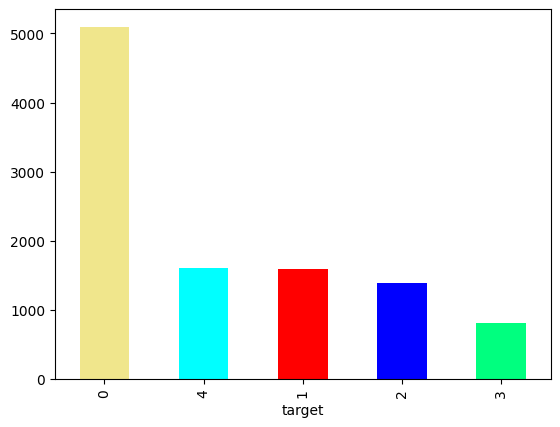

In [34]:
trainFile["target"].value_counts().plot(kind="bar", color=["Khaki", "aqua", "red", "blue", "SpringGreen"])

# Gráficos

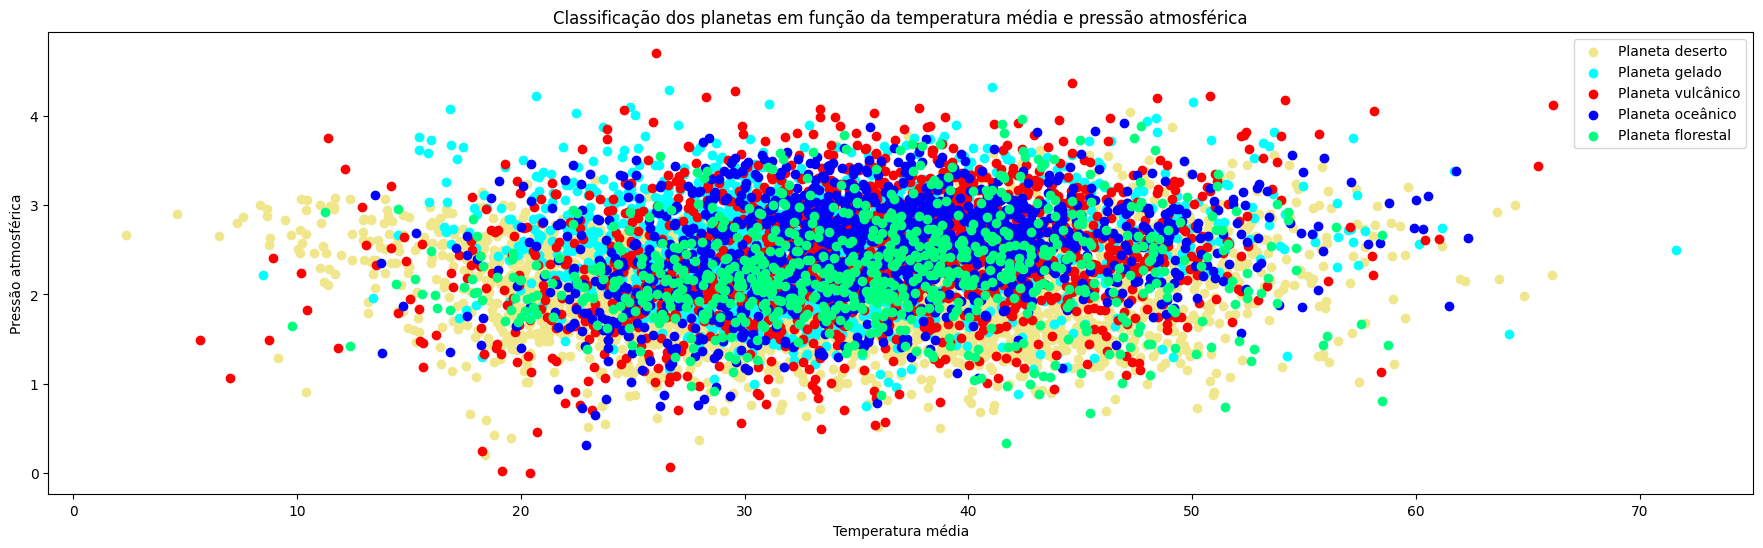

In [35]:

plt.figure(figsize=(22,6))

plt.scatter(trainFile["col_0"][trainFile["target"] == 0 ], 
            trainFile["col_2"][trainFile["target"] == 0], 
            c="Khaki")

plt.scatter(trainFile["col_0"][trainFile["target"] == 4], 
            trainFile["col_2"][trainFile["target"] == 4], 
            c="aqua")

plt.scatter(trainFile["col_0"][trainFile["target"] == 1], 
            trainFile["col_2"][trainFile["target"] == 1], 
            c="red")

plt.scatter(trainFile["col_0"][trainFile["target"] == 2], 
            trainFile["col_2"][trainFile["target"] == 2], 
            c="blue")

plt.scatter(trainFile["col_0"][trainFile["target"] == 3], 
            trainFile["col_2"][trainFile["target"] == 3], 
            c="SpringGreen")


plt.title("Classificação dos planetas em função da temperatura média e pressão atmosférica")
plt.xlabel("Temperatura média")
plt.legend(["Planeta deserto", "Planeta gelado", "Planeta vulcânico", "Planeta oceânico", "Planeta florestal"])
plt.ylabel("Pressão atmosférica");

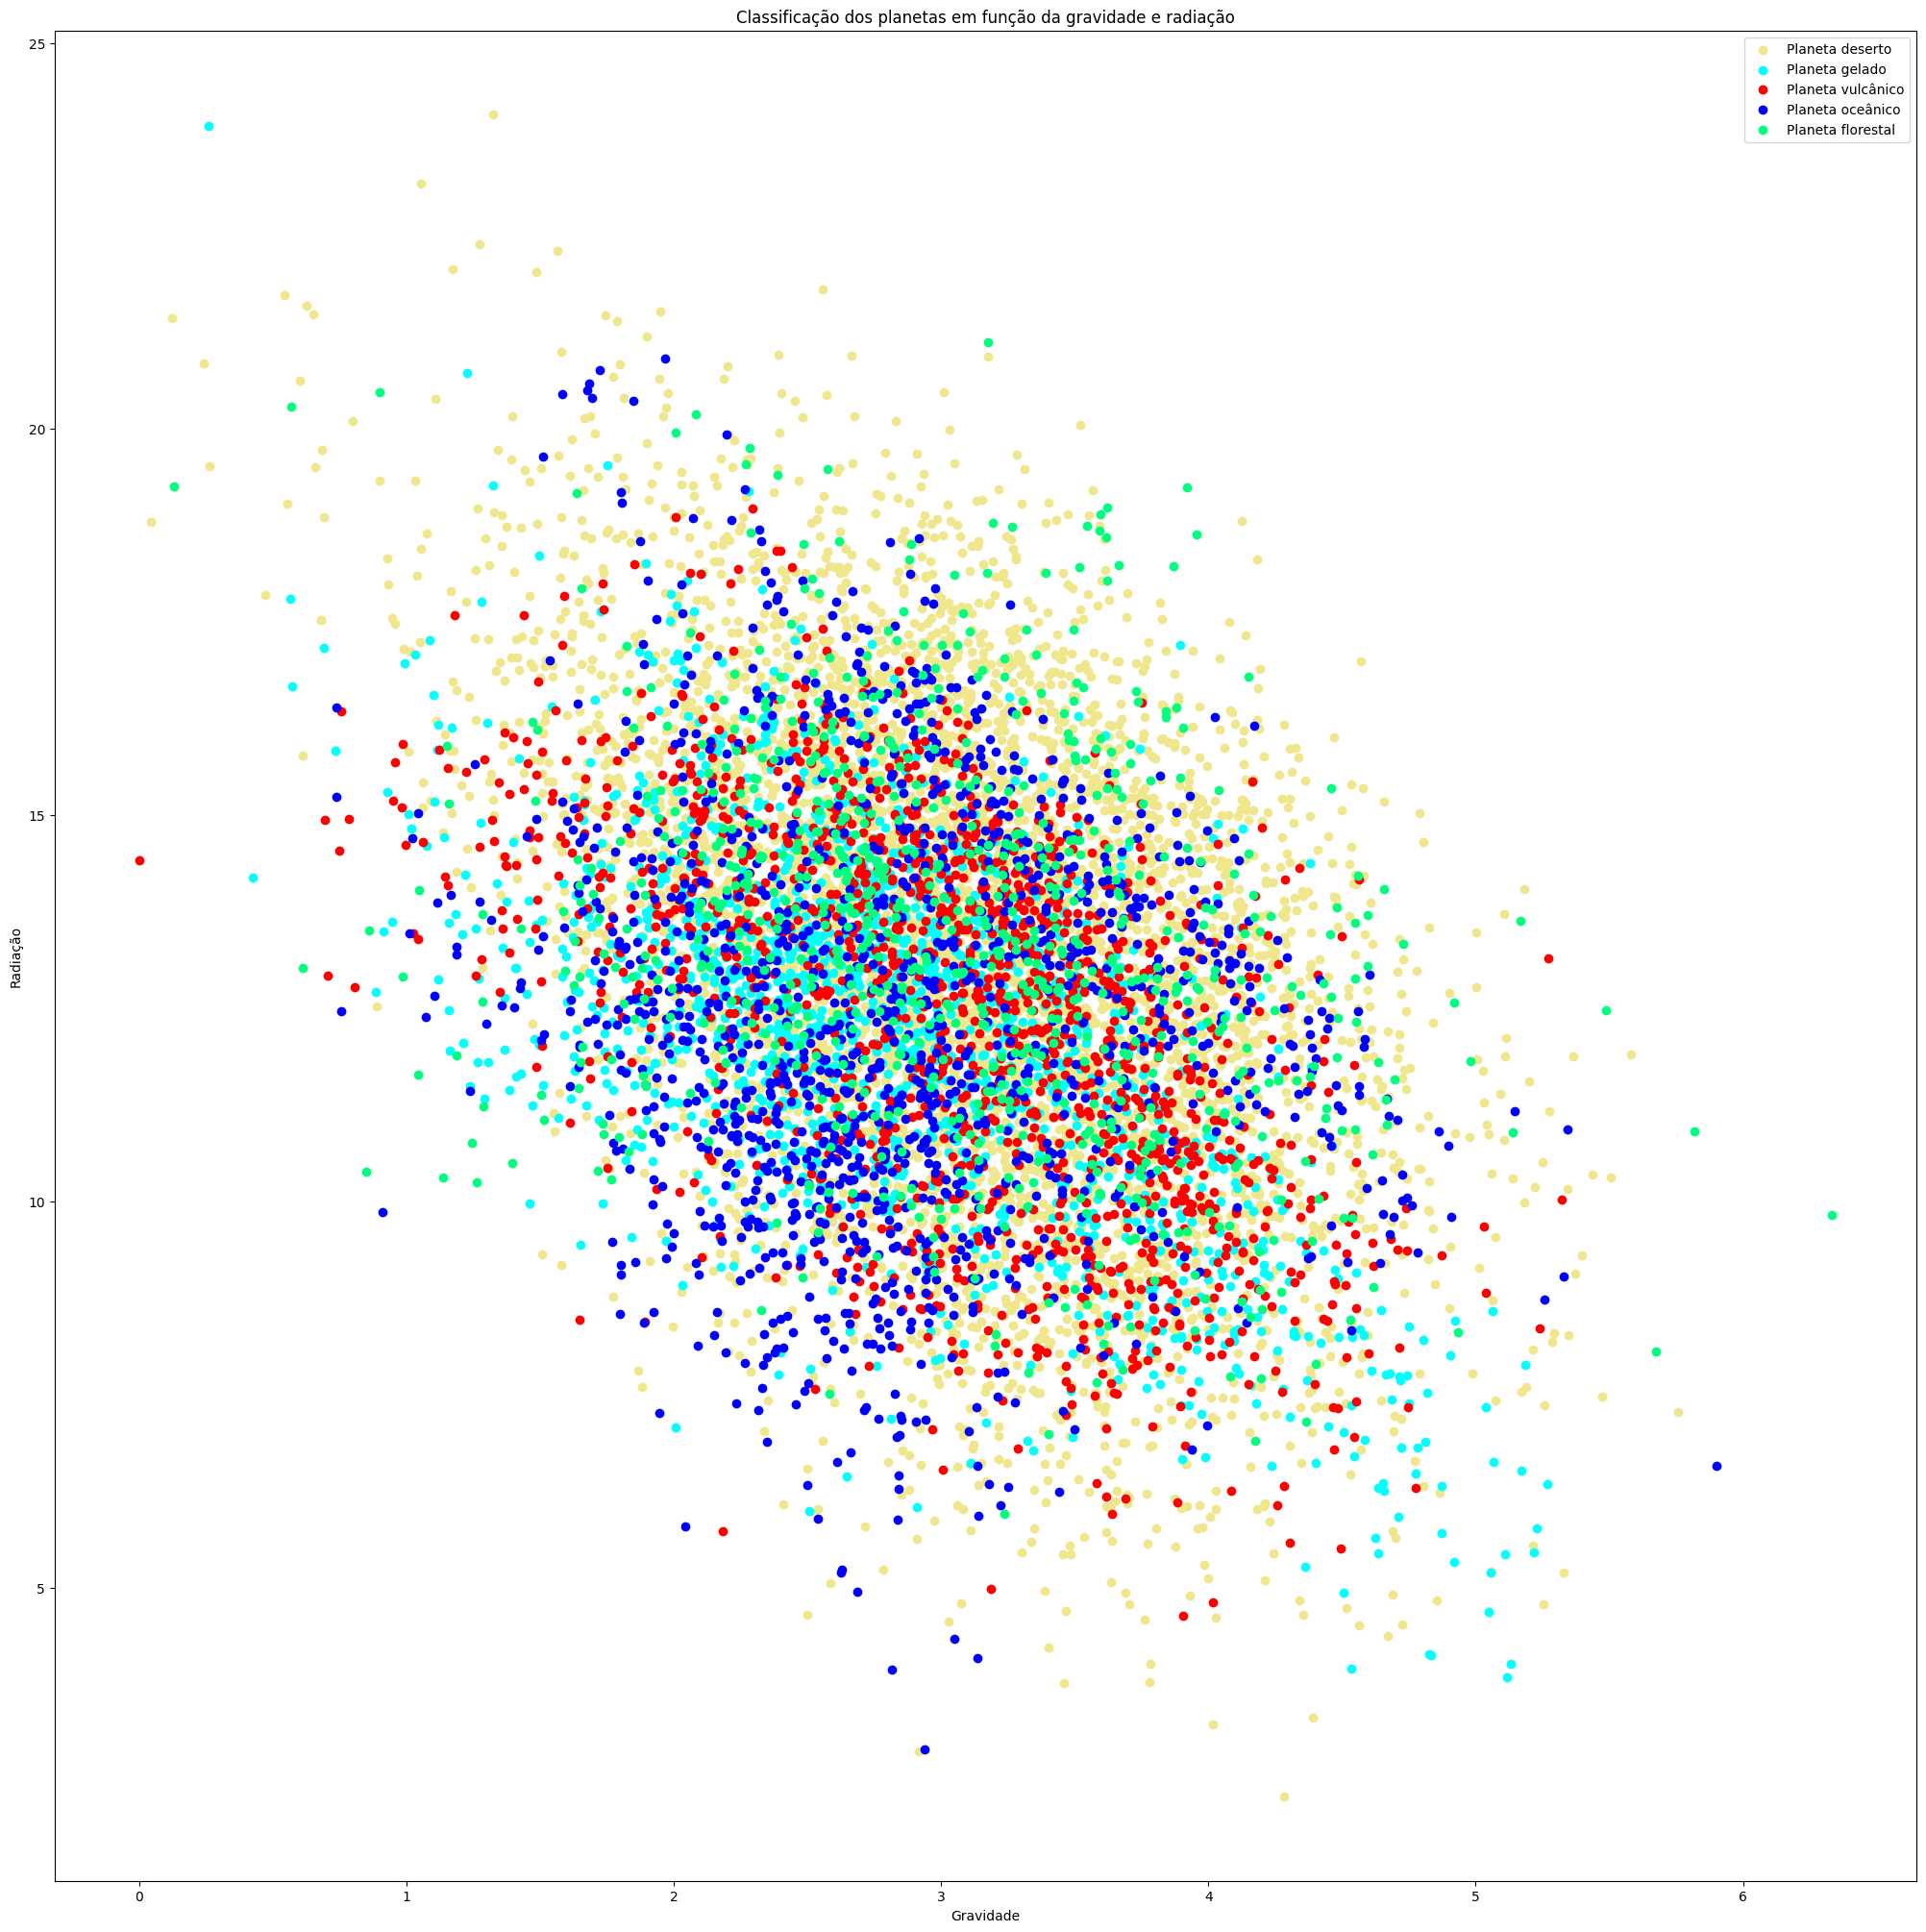

In [36]:

plt.figure(figsize=(25,25))

plt.scatter(trainFile["col_1"][trainFile["target"] == 0 ], 
            trainFile["col_3"][trainFile["target"] == 0], 
            c="Khaki")

plt.scatter(trainFile["col_1"][trainFile["target"] == 4], 
            trainFile["col_3"][trainFile["target"] == 4], 
            c="aqua")

plt.scatter(trainFile["col_1"][trainFile["target"] == 1], 
            trainFile["col_3"][trainFile["target"] == 1], 
            c="red")

plt.scatter(trainFile["col_1"][trainFile["target"] == 2], 
            trainFile["col_3"][trainFile["target"] == 2], 
            c="blue")

plt.scatter(trainFile["col_1"][trainFile["target"] == 3], 
            trainFile["col_3"][trainFile["target"] == 3], 
            c="SpringGreen")


plt.title("Classificação dos planetas em função da gravidade e radiação")
plt.xlabel("Gravidade")
plt.legend(["Planeta deserto", "Planeta gelado", "Planeta vulcânico", "Planeta oceânico", "Planeta florestal"])
plt.ylabel("Radiação");

# Modelagem dos dados

In [42]:
trainFile.isnull().sum()

id        0
col_0     0
col_1     0
col_2     0
col_3     0
col_4     0
col_5     0
col_6     0
col_7     0
col_8     0
col_9     0
col_10    0
col_11    0
col_12    0
target    0
dtype: int64

In [37]:
X = trainFile.drop("target", axis=1)
y = trainFile["target"]

In [38]:
X.head()

,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12
0,12251,38.763463,4.372530,2.888516,12.352539,18.906550,9.605924,3.456596,3.959477,4.738227,3.692509,11.192263,9.076242,4.692962
1,4529,32.192181,3.158109,2.134617,16.193530,26.786878,9.347958,5.093277,6.893790,3.399840,2.080853,19.486692,12.349952,3.217670
2,11284,28.370782,3.006067,1.969280,15.163950,28.515109,7.946870,5.609813,6.511194,3.256799,2.290993,18.405205,14.781329,3.231217
3,10993,38.215409,2.174232,2.935104,11.501867,18.419571,7.954005,4.229832,4.522060,4.869234,3.383514,12.782517,17.343742,5.009182
4,12927,38.904545,2.956164,2.253149,12.282552,25.547887,8.168776,3.653026,6.809110,4.971130,2.127363,19.247327,20.115183,3.560524


In [39]:
y.head()

0    2
1    0
2    0
3    2
4    3
Name: target, dtype: int64

# Treino e teste